Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import sqlite3
from sqlite3 import Error
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes = True)
fs_api = os.environ["FSQ_API_KEY"]

In [2]:
#importing the dataframes
city_bike = pd.read_csv('city_bike.csv')
yelp_df = pd.read_csv('df_yelp.csv')
fsq_csv = pd.read_csv('forsquar_data.csv')

In [3]:
bike_info = pd.merge(city_bike, yelp_df, on=['station_location'], how='inner')
bike_info

,station_id,city,station_name,latitude_x,longitude_x,slots,empty_slots,free_bikes,station_location,name,address,latitude_y,longitude_y,country,yelp_rating,yelp_review,state,station_near
0,fb337bbed72e2be090071e199899b2be,Bike Share Toronto,Queen St E / Woodward Ave,43.665269,-79.319796,19,16,3,"43.665269, -79.319796",Richmond Station,"1 Richmond Street W, Toronto, ON M5H 3W4, Canada",43.651373,-79.379285,CA,4.5,892,ON,"43.648797, -79.381035"
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Bike Share Toronto,Primrose Ave / Davenport Rd,43.671420,-79.445947,15,8,7,"43.671420, -79.445947",Sap,"401 Bay Street, Toronto, ON M5H 2Y4, Canada",43.651946,-79.381114,CA,3.5,549,ON,"43.649520, -79.381898"
2,a09c67c0b419654d907c9134b108e328,Bike Share Toronto,Queen St. E / Rhodes Ave.,43.666224,-79.317693,23,21,2,"43.666224, -79.317693",Pai Northern Thai Kitchen,"18 Duncan Street, Toronto, ON M5H 3G8, Canada",43.647840,-79.388720,CA,4.5,3419,ON,"43.649463, -79.377261"
3,d6a9daee68070a8b106cfb598d81308c,Bike Share Toronto,Bond St / Queen St E,43.653236,-79.376716,25,25,0,"43.653236, -79.376716",The Keg Steakhouse + Bar - York Street,"165 York Street, Toronto, ON M5H 3R8, Canada",43.650011,-79.383959,CA,4.0,305,ON,"43.650200, -79.377940"
4,8f8af40d9388c8a3962559e8681d3db7,Bike Share Toronto,Church St / Alexander St,43.663722,-79.380288,15,8,7,"43.663722, -79.380288",Eggspectation,"483 Bay Street, South Tower, Toronto, ON M5G 2...",43.653272,-79.381246,CA,4.0,768,ON,"43.649979, -79.384075"


In [4]:
bike_info_all = pd.merge(bike_info, fsq_csv, on=['station_location'], how='inner')
bike_info_all

,station_id,city,station_name,latitude_x,longitude_x,slots,empty_slots,free_bikes,station_location,name_x,...,yelp_rating,yelp_review,state_x,station_near_x,categories,name_y,distance,country_y,state_y,station_near_y
0,fb337bbed72e2be090071e199899b2be,Bike Share Toronto,Queen St E / Woodward Ave,43.665269,-79.319796,19,16,3,"43.665269, -79.319796",Richmond Station,...,4.5,892,ON,"43.648797, -79.381035",13034,Pilot Coffee Roasters,149,CA,ON,"43.665269,-79.319796"
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Bike Share Toronto,Primrose Ave / Davenport Rd,43.671420,-79.445947,15,8,7,"43.671420, -79.445947",Sap,...,3.5,549,ON,"43.649520, -79.381898",13068,Cactus Club Cafe,143,CA,ON,"43.67142,-79.445947"
2,a09c67c0b419654d907c9134b108e328,Bike Share Toronto,Queen St. E / Rhodes Ave.,43.666224,-79.317693,23,21,2,"43.666224, -79.317693",Pai Northern Thai Kitchen,...,4.5,3419,ON,"43.649463, -79.377261",13027,Beer Bistro,231,CA,ON,"43.666224,-79.317693"
3,d6a9daee68070a8b106cfb598d81308c,Bike Share Toronto,Bond St / Queen St E,43.653236,-79.376716,25,25,0,"43.653236, -79.376716",The Keg Steakhouse + Bar - York Street,...,4.0,305,ON,"43.650200, -79.377940",13006,CRAFT Beer Market Toronto,141,CA,ON,"43.653236,-79.376716"
4,8f8af40d9388c8a3962559e8681d3db7,Bike Share Toronto,Church St / Alexander St,43.663722,-79.380288,15,8,7,"43.663722, -79.380288",Eggspectation,...,4.0,768,ON,"43.649979, -79.384075",13383,The Keg Steakhouse + Bar,329,CA,ON,"43.663722,-79.380288"


In [5]:
new_df = bike_info[['name', 'latitude_x', 'longitude_x', 'latitude_y', 'longitude_y', 'slots', 'empty_slots', 'free_bikes', 'yelp_rating', 'yelp_review']]

# Print the new DataFrame
new_df 

,name,latitude_x,longitude_x,latitude_y,longitude_y,slots,empty_slots,free_bikes,yelp_rating,yelp_review
0,Richmond Station,43.665269,-79.319796,43.651373,-79.379285,19,16,3,4.5,892
1,Sap,43.671420,-79.445947,43.651946,-79.381114,15,8,7,3.5,549
2,Pai Northern Thai Kitchen,43.666224,-79.317693,43.647840,-79.388720,23,21,2,4.5,3419
3,The Keg Steakhouse + Bar - York Street,43.653236,-79.376716,43.650011,-79.383959,25,25,0,4.0,305
4,Eggspectation,43.663722,-79.380288,43.653272,-79.381246,15,8,7,4.0,768


In [6]:
new_df.to_csv('df_new.csv', index=False)

In [7]:
new_df.shape

(5, 10)

In [8]:
duplicate_rows = new_df[new_df.duplicated()]
duplicate_rows

,name,latitude_x,longitude_x,latitude_y,longitude_y,slots,empty_slots,free_bikes,yelp_rating,yelp_review


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [9]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import plotly.express as px

In [11]:
fig = px.scatter_mapbox(new_df, lat='latitude_x', lon='longitude_x', hover_name='name',
                        color_discrete_sequence=['blue'], zoom=10)
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})

fig.show()

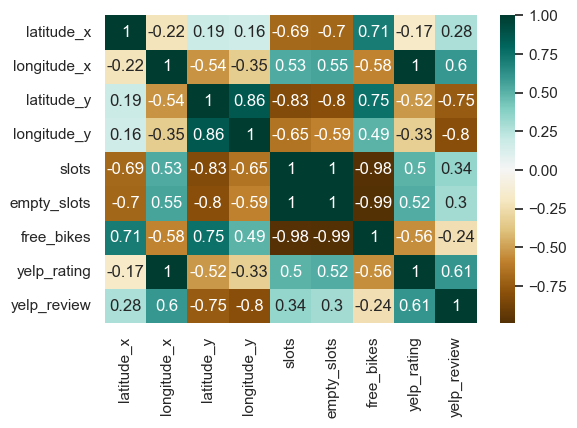

In [12]:
# Select only the numeric columns for correlation calculation
numeric_columns = ['latitude_x', 'longitude_x', 'latitude_y', 'longitude_y', 'slots', 'empty_slots', 'free_bikes', 'yelp_rating', 'yelp_review']
numeric_df = new_df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True)
plt.show()

<Axes: xlabel='empty_slots', ylabel='free_bikes'>

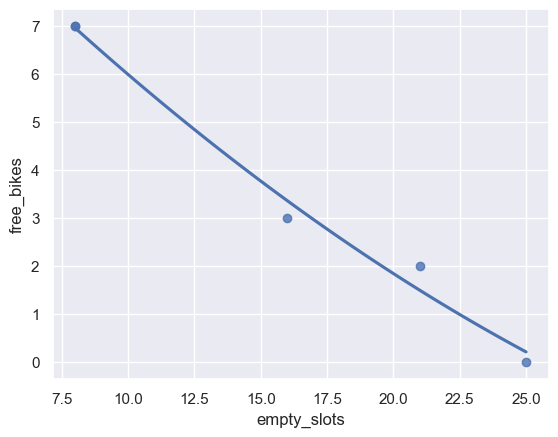

In [13]:
sns.regplot(x = new_df['empty_slots'], y = new_df['free_bikes'], order = 2, ci = None) 

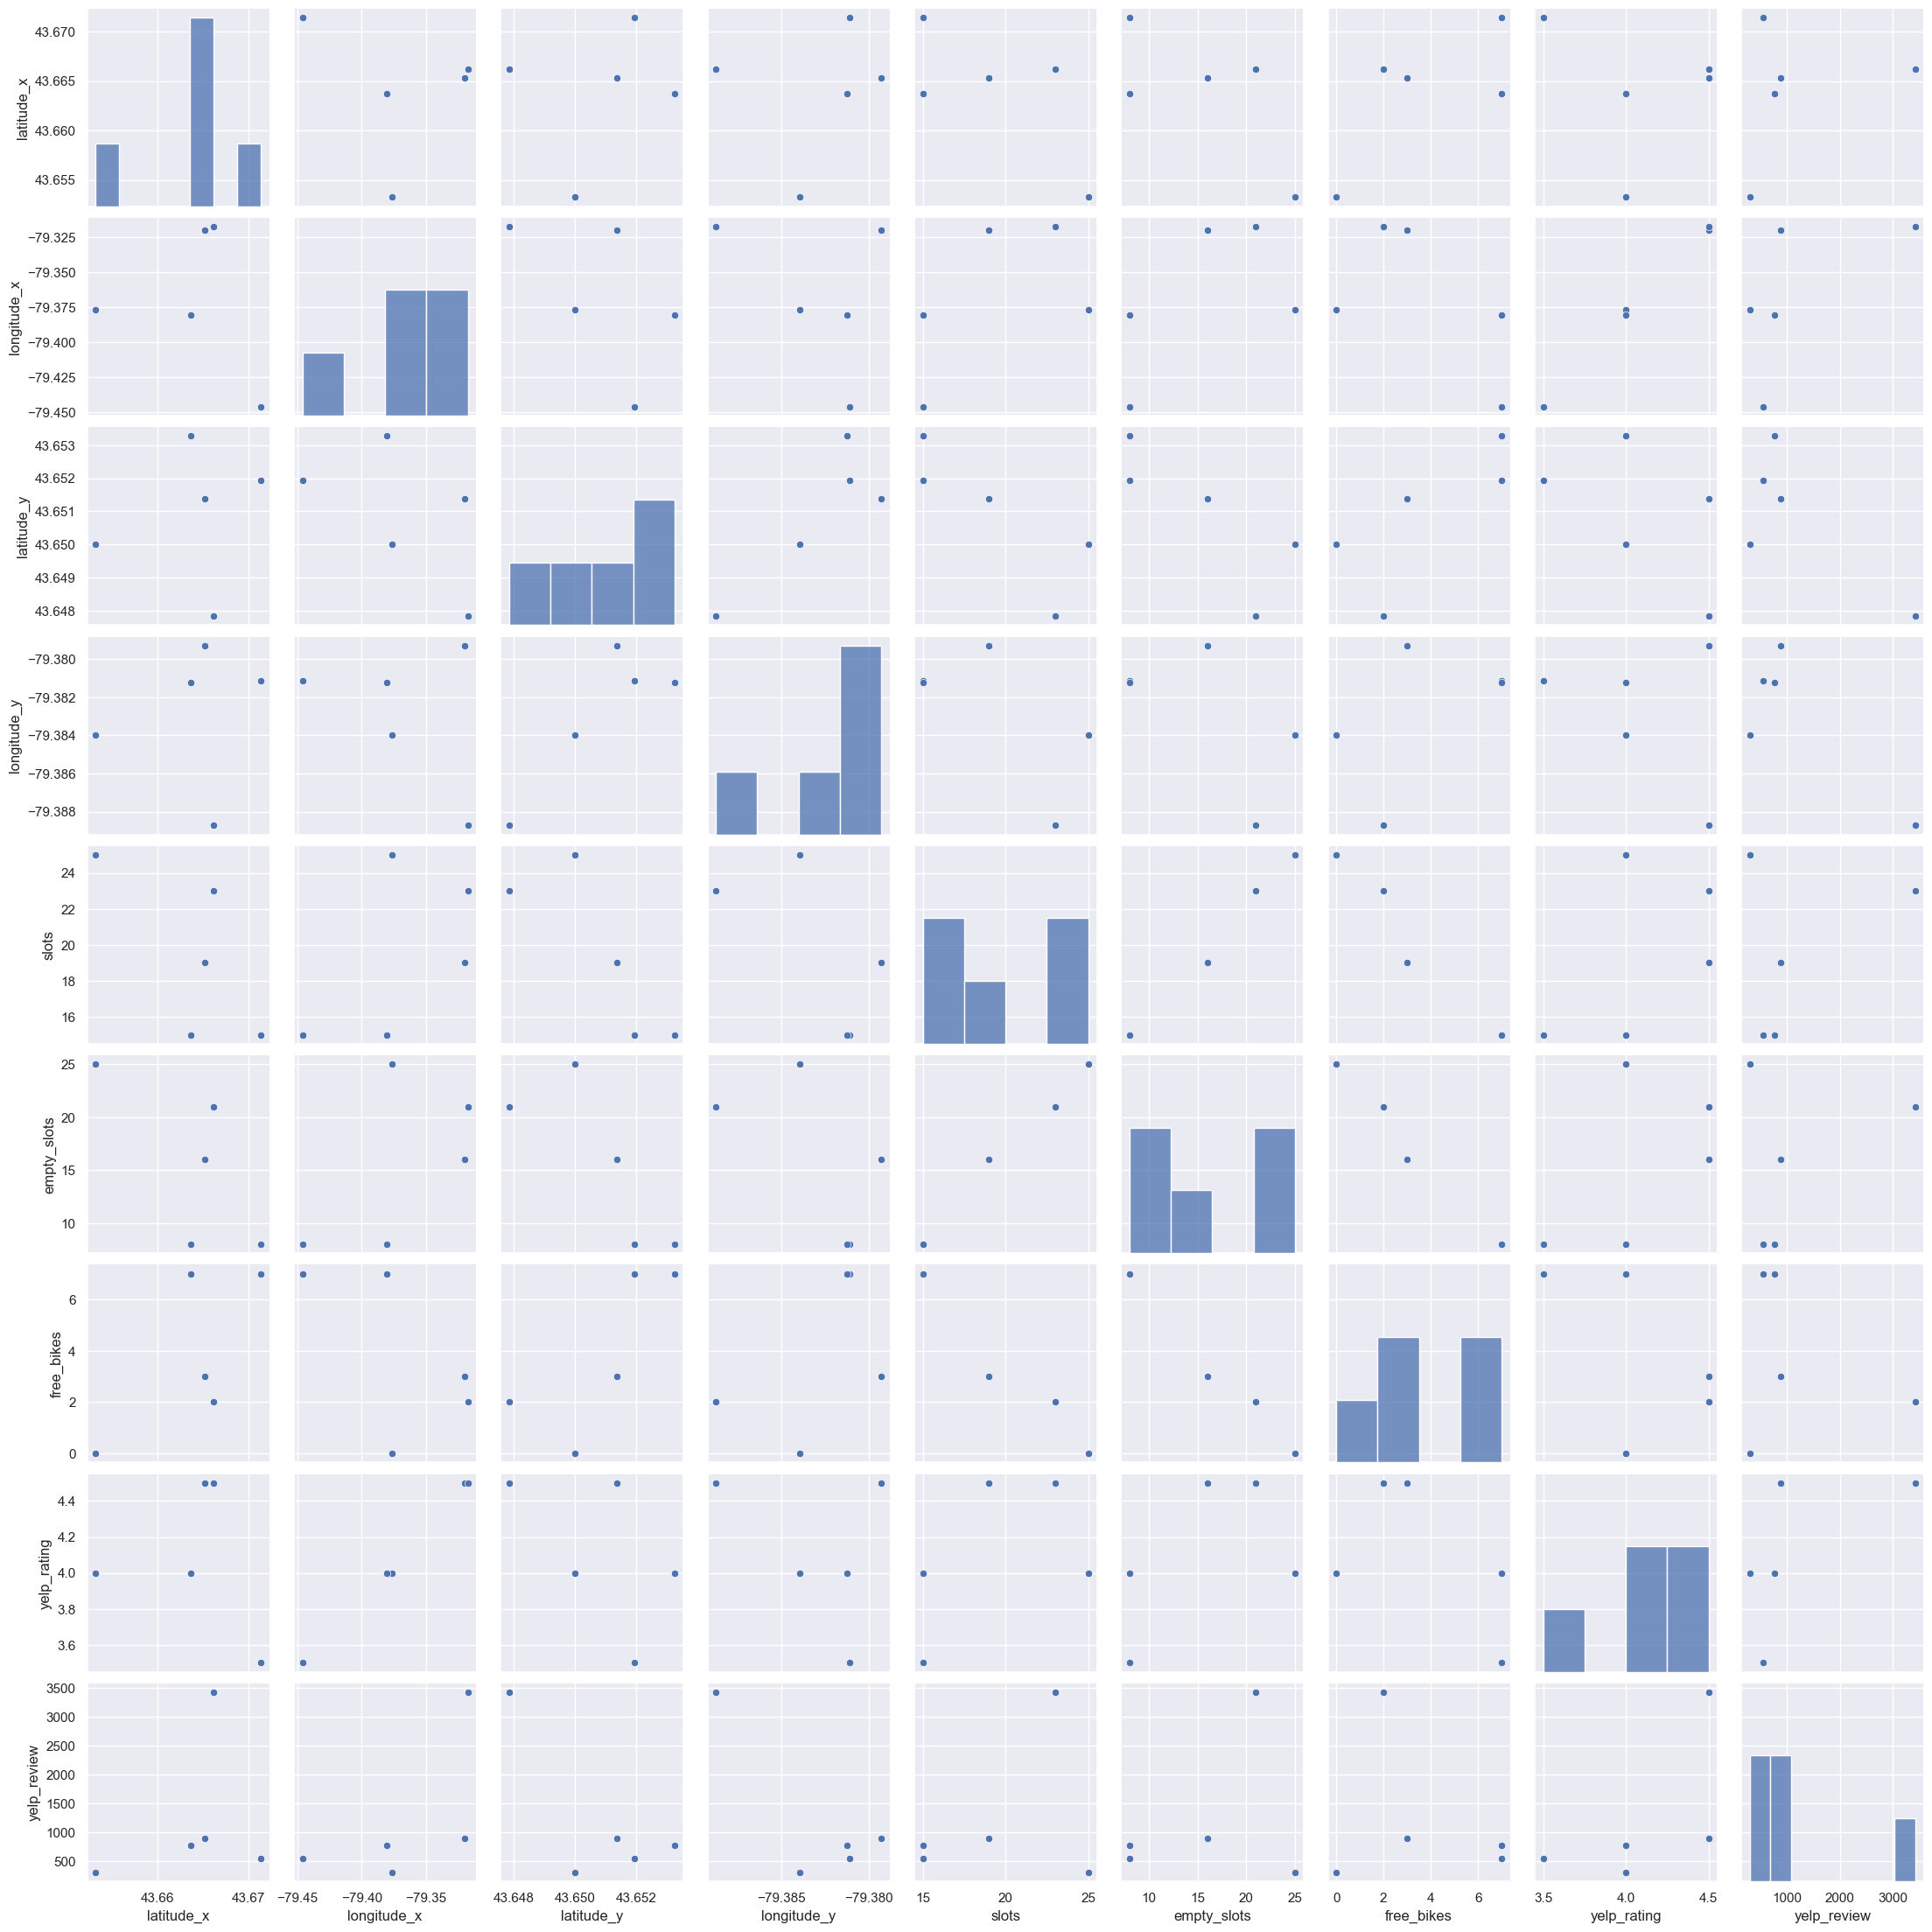

In [14]:
sns.pairplot(new_df)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [15]:
import sqlite3
import pandas as pd
from sqlite3 import Error

# SQLite database
data = sqlite3.connect('mydatabase.db')

# Create the 'city_bike' table
city_bike.to_sql('city_bike', data, if_exists='replace', index=False)

# Create the 'yelp_df' table
yelp_df.to_sql('yelp_df', data, if_exists='replace', index=False)

# Create the 'fsq_csv' table
fsq_csv.to_sql('fsq_csv', data, if_exists='replace', index=False)

# Close for the database connection
data.close()

Look at the data before and after the join to validate your data.

In [16]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('mydatabase.db')

# Create a cursor object
cursor = conn.cursor()

# Execute your SQL queries
cursor.execute("SELECT * FROM city_bike")
result = cursor.fetchall()

# Process the query result as needed
for row in result:
    print(row)

# Close the cursor and the database connection
cursor.close()
conn.close()


('fb337bbed72e2be090071e199899b2be', 'Bike Share Toronto', 'Queen St E / Woodward Ave', 43.665269, -79.319796, 19, 16, 3, '43.665269, -79.319796')
('4ff88d5880e71aa40d34cfe5d09b0ca7', 'Bike Share Toronto', 'Primrose Ave / Davenport Rd', 43.67142, -79.445947, 15, 8, 7, '43.671420, -79.445947')
('a09c67c0b419654d907c9134b108e328', 'Bike Share Toronto', 'Queen St. E / Rhodes Ave.', 43.666224, -79.317693, 23, 21, 2, '43.666224, -79.317693')
('d6a9daee68070a8b106cfb598d81308c', 'Bike Share Toronto', 'Bond St / Queen St E', 43.653236, -79.376716, 25, 25, 0, '43.653236, -79.376716')
('8f8af40d9388c8a3962559e8681d3db7', 'Bike Share Toronto', 'Church St / Alexander St', 43.663722, -79.380288, 15, 8, 7, '43.663722, -79.380288')
('5a441560e262305d1934fb3ada5a9517', 'Bike Share Toronto', 'University Ave / Gerrard St W (East Side)', 43.657763, -79.389165, 25, 9, 16, '43.657763, -79.389165')
('18ea490ab3ca4d10e2927308416edbef', 'Bike Share Toronto', 'Edward St / Yonge St', 43.656729, -79.382736, 23,